# Project: The Movie DataBase -TMDB

**Table of Contents**

* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

# Introduction

Initially this Dataset includes - 10866 rows and 21 columns -['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'genres', 'production_companies','release_date','vote_count', 'vote_average', 'release_year', 'budget_adj','revenue_adj']

I will be working on this data and will remove the unwanted columns and then drop the redudant and zero values data.

# After Analysing the Data ,following questions could be answered:

1. List of movies with maximum and minimum value for each attribute - Budget,Revenue,Runtime,Popularity...
2. Year of release vs Profitability.
3. Visualization of Popularity vs Revenue ('high', 'mod_high', 'medium', 'low')
4. Top 10 popular Cast,Genres and Directors
5. Average runtime of the movies

**Importing required packages- pandas,numpy,matplotlib and seaborn**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv


# Data Wrangling

**General Properties of Dataframe**

In [2]:
# Data is loaded
data = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [3]:
data.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
data.shape

(10866, 21)

In [7]:
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
data_duplicate = data[data.duplicated()]
print(data_duplicate)

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090    3/20/2010        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [10]:
#drop duplicates values
data.drop_duplicates(keep='first',inplace = True)
data.shape

(10865, 21)

# Data Cleaning

**Dropping the columns which I am not considering for Data Analysis. Also, removed duplicates from the Dataframe**

In [11]:
data.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date','vote_count','budget','revenue'],axis=1, inplace = True)

**I have dropped the above listed columns and have mentioned reasons for each below:**

1. 'id','imdb_id','homepage','tagline','keywords','overview - I will not be using these columns for analysing the questions i have mentioned above.
2. 'release_date'- I have planned to analyse it yearly. So Date is not required , I have kept 'release_year' column for this purpose.
3. 'vote_count'- I will be considerig vote_average , so dropping the 'vote_count'.
4. 'budget','revenue'- Since it will be better to consider 'budget_adj' and 'revenue_adj' instead of budget and revenue.

In [12]:
data.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   cast                  10789 non-null  object 
 3   director              10821 non-null  object 
 4   runtime               10865 non-null  int64  
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   vote_average          10865 non-null  float64
 8   release_year          10865 non-null  int64  
 9   budget_adj            10865 non-null  float64
 10  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1018.6+ KB


In [14]:
data.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [15]:
data.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**budget_adj,revenue_adj and Runtime should not have zero values...Hence dropping the NA values first and then will check for zero values**

In [16]:
data.dropna(inplace = True)
print(data.shape)

(9772, 11)


In [17]:
data.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
data.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,102.926627,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,27.877432,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,100.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,112.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,877.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


**'budget_adj' ,'revenue_adj' , 'runtime' of a movie cannot not be zero so in order to fix that issue, we will replace 0 with NaN and then drop those values.**

**[https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame] Used this link to understand how to replace 0 with NaN**

**Dropping zero values -as they might effect the analysis**

In [19]:
data['budget_adj'] = data['budget_adj'].replace(0,np.NaN)
data['revenue_adj'] = data['revenue_adj'].replace(0,np.NaN)
data['runtime'] = data['runtime'].replace(0,np.NaN)

In [20]:
data.isnull().sum()

popularity                 0
original_title             0
cast                       0
director                   0
runtime                   13
genres                     0
production_companies       0
vote_average               0
release_year               0
budget_adj              4751
revenue_adj             5022
dtype: int64

In [21]:
data.dropna(inplace = True)# dropped all the columns with zero values, this might be a limitation of this project as it has dropped many rows

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   original_title        3805 non-null   object 
 2   cast                  3805 non-null   object 
 3   director              3805 non-null   object 
 4   runtime               3805 non-null   float64
 5   genres                3805 non-null   object 
 6   production_companies  3805 non-null   object 
 7   vote_average          3805 non-null   float64
 8   release_year          3805 non-null   int64  
 9   budget_adj            3805 non-null   float64
 10  revenue_adj           3805 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 356.7+ KB


In [23]:
data.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,109.351117,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,19.845678,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,96.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,106.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,119.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
data.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08


In [25]:
data.runtime.unique()

array([124., 120., 119., 136., 137., 156., 125., 141.,  91.,  94., 148.,
       108., 105., 167., 109., 115., 112., 130., 123., 114., 131., 128.,
       132., 103., 117.,  93., 111., 147., 106., 122., 116.,  97., 118.,
       121., 100., 133.,  92.,  96., 102.,  88.,  99.,  89., 107.,  95.,
       104., 101.,  98., 113.,  82.,  87.,  90., 134.,  83.,  78., 129.,
       169., 144., 145., 135., 139., 165., 142., 153., 127., 110., 164.,
       138.,  84.,  81.,  79.,  85.,  86., 175.,  80., 162., 158., 140.,
       161., 170., 150., 146.,  77., 338., 189., 157., 159., 126., 188.,
        74., 178., 152., 183., 166.,  75., 213., 160., 155.,  63., 154.,
       149., 179.,  72.,  73., 191.,  76., 171., 143., 172., 201., 214.,
        15., 194., 177., 180., 187., 151., 163.,  66., 219., 193.,  26.,
       192., 202., 195.,  69., 200., 184., 216., 181., 186., 168., 197.,
       248., 174., 199., 182.])

In [26]:
data['revenue_adj'].unique

<bound method Series.unique of 0        1.392446e+09
1        3.481613e+08
2        2.716190e+08
3        1.902723e+09
4        1.385749e+09
             ...     
10822    2.266436e+08
10828    8.733419e+07
10829    4.030809e+07
10835    1.343603e+08
10848    8.061618e+07
Name: revenue_adj, Length: 3805, dtype: float64>

**Change the column DataTypes :**

In [27]:
change_coltype = ['budget_adj', 'revenue_adj', 'runtime']

In [28]:
data[change_coltype] = data[change_coltype].applymap(np.int64)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   original_title        3805 non-null   object 
 2   cast                  3805 non-null   object 
 3   director              3805 non-null   object 
 4   runtime               3805 non-null   int64  
 5   genres                3805 non-null   object 
 6   production_companies  3805 non-null   object 
 7   vote_average          3805 non-null   float64
 8   release_year          3805 non-null   int64  
 9   budget_adj            3805 non-null   int64  
 10  revenue_adj           3805 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 356.7+ KB


In [30]:
data.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939,1392445893
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939,348161292
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919,1902723130
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923,1385748801


**Insert a new column -Profit, which calculated profit of movie(revenue-budget)**

In [31]:
data['profit'] = data['revenue_adj'] - data['budget_adj']

In [32]:
data.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939,1392445893,1254445954
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939,348161292,210161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955,271619025,170419070


# Exploratory Data Analysis

# Question 1 : List of movies with maximum and minimum value for each attribute - Budget,Revenue,Runtime,Popularity

**Build a function to find max and minimum values for all the columns : This function will return the entire row with the max and min vallues of the column passed in the function.**

In [33]:
def min_max(column_name):
    
    max_value = data[column_name].idxmax()
    max_details = pd.DataFrame(data.loc[max_value])
    
    min_value = data[column_name].idxmin()
    min_details = pd.DataFrame(data.loc[min_value])
    
    both_values = pd.concat([max_details, min_details],axis=1)
    
    return(both_values)

**i) Details of movie with maximum and minimum Popularity**

In [34]:
min_max('popularity')

,0,6065
popularity,32.9858,0.010335
original_title,Jurassic World,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Thomas Kretschmann|Yanina Studilina|Philippe R...
director,Colin Trevorrow,Fyodor Bondarchuk
runtime,124,131
genres,Action|Adventure|Science Fiction|Thriller,War|Action
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Art Pictures Studio
vote_average,6.5,5.5
release_year,2015,2013
budget_adj,137999939,28081000


**Most popular movie is : 'Jurassic World' and Least popular is : 'Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´'**

**ii) Details of movie with maximum and minimum Budget**

In [35]:
min_max('budget_adj')

,2244,3581
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
vote_average,6.4,5.3
release_year,2010,2011
budget_adj,425000000,0


**Highest Budget Movie : The Warrior's Way**

**Lowest Budget Movie : Love, Wedding, Marriage**

**iii) Details of movie with maximum and minimum Revenue**

In [36]:
min_max('revenue_adj')

,1386,5067
popularity,9.43277,0.462609
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
vote_average,7.1,6.4
release_year,2009,2003
budget_adj,240886902,7112115


**Highest Revenue Movie : Avatar**

**Lowest Budget Movie : Shattered Glass**

**iv) Details of movie with maximum and minimum Runtime**

In [37]:
min_max('runtime')

,2107,5162
popularity,0.534192,0.208637
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
vote_average,6.2,6.8
release_year,2010,2003
budget_adj,18000000,11


Maximum Runtime movie : Carlos

Minimum Runtime Movie : Kid's Story

v) Most latest and oldest movie in this Dataframe

In [38]:
min_max('release_year')

,0,10141
popularity,32.9858,2.61036
original_title,Jurassic World,Psycho
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Anthony Perkins|Vera Miles|John Gavin|Janet Le...
director,Colin Trevorrow,Alfred Hitchcock
runtime,124,109
genres,Action|Adventure|Science Fiction|Thriller,Drama|Horror|Thriller
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Shamley Productions
vote_average,6.5,8
release_year,2015,1960
budget_adj,137999939,5949601


Latest movie : Jurassic World

Oldest Movie : Psycho

vi) Minimum and Maximum vote_average

In [39]:
min_max('vote_average')

,4178,4859
popularity,7.19204,0.111351
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family
production_companies,Castle Rock Entertainment,Threshold Entertainment|Lions Gate Family Ente...
vote_average,8.4,2.2
release_year,1994,2012
budget_adj,36777789,61733378


The Shawshank Redemption got the maximum vote_average and Foodfight!! got the minimum

In [40]:
min_max('profit')

,1329,2244
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
vote_average,7.9,6.4
release_year,1977,2010
budget_adj,39575591,425000000


Maximum profit earned by 'Star Wars'

Minimum profit earned by 'The Warrior's Way'

# Question 2 : Year of Release vs Profitability.

In [41]:
pro_year = data.groupby('release_year')['profit'].sum()

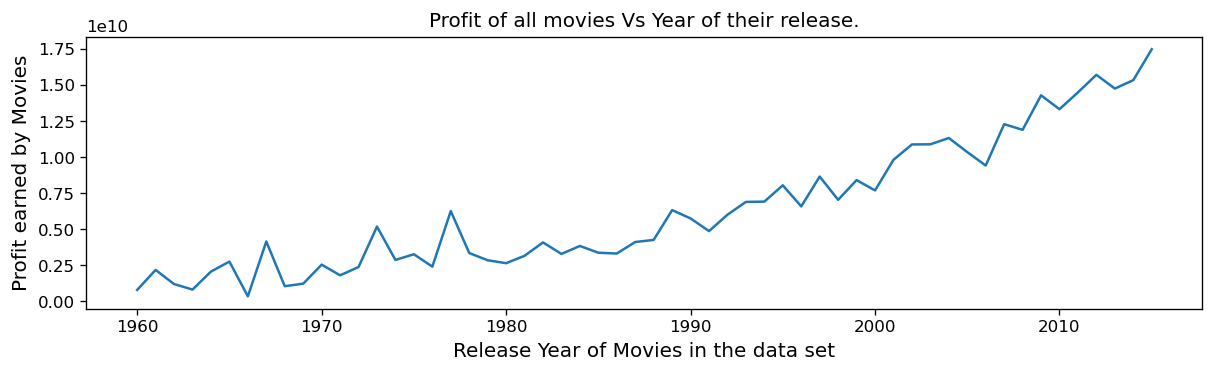

In [42]:
plt.figure(figsize=(12,3),dpi=120)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profit earned by Movies', fontsize = 12)
plt.title('Profit of all movies Vs Year of their release.')
plt.plot(pro_year)

The above graph shows that profit of movies is increased with years.

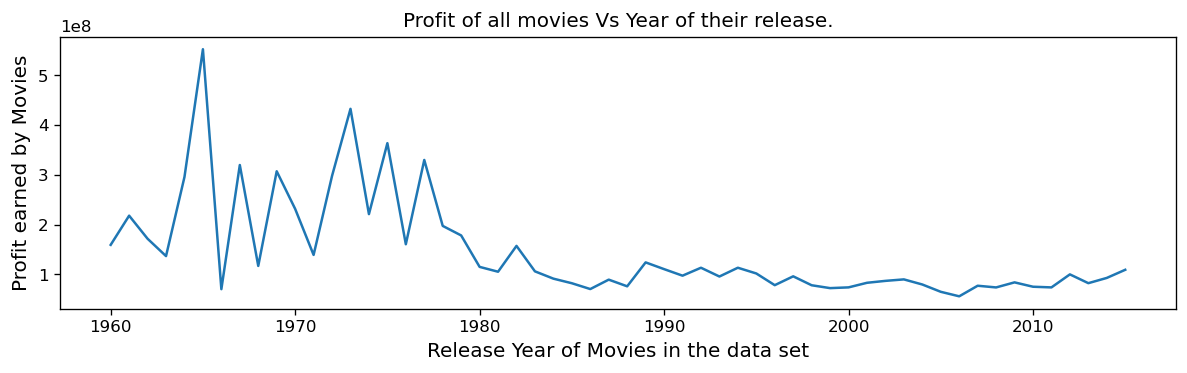

In [43]:
pro_year = data.groupby('release_year')['profit'].mean()

plt.figure(figsize=(12,3),dpi=120)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profit earned by Movies', fontsize = 12)
plt.title('Profit of all movies Vs Year of their release.')
plt.plot(pro_year)

According to the plot year 1960-1970 the most profitable years And the profit was very low between the years 2000-2010

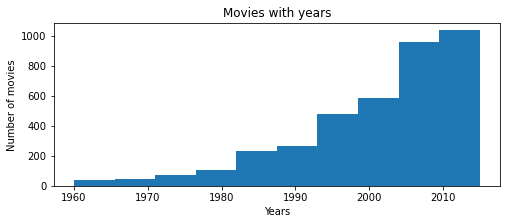

In [44]:
plt.figure(figsize = (8,3))
plt.hist(data['release_year'])
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Movies with years')
plt.show()

**This graph shows that number of movies in Dataframe also increased with years..**

# Question 3 : Visualization of Popularity vs Revenue ('high', 'mod_high', 'medium', 'low')

In [45]:
rev_data = data.describe().revenue_adj
rev_data

count    3.805000e+03
mean     1.387159e+08
std      2.169973e+08
min      2.000000e+00
25%      1.925371e+07
50%      6.284688e+07
75%      1.658054e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [46]:
bin_edges = [rev_data[3], rev_data[4], rev_data[5], rev_data[6], rev_data[7]]
bin_edges

[2.0, 19253711.0, 62846878.0, 165805400.0, 2827123750.0]

In [47]:
bin_names = ['High','Mod_high','Medium','Low']

In [48]:
data['new_popular'] = pd.cut(data['revenue_adj'], bin_edges, labels=bin_names)

Text(0.5, 1.0, 'Popularity vs Revenue')

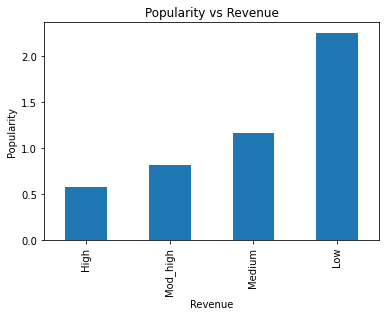

In [49]:
pop_plot = data.groupby('new_popular')['popularity'].mean()

pop_plot.plot.bar()
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Popularity vs Revenue')

Text(0.5, 1.0, 'Revenue vs popularity over the years')

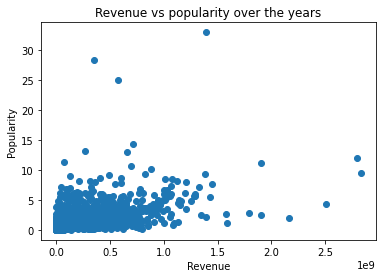

In [50]:
plt.scatter(x= data['revenue_adj'], y= data['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs popularity over the years')

This shows that movies with low Revenue has high popularity

# Question 4 : Top 10 popular Cast,Genres and Directors

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Harrison Ford         34
Tom Hanks             34
Sylvester Stallone    34
dtype: int64


[Text(0, 0.5, 'Number of time casted'),
 Text(0.5, 1.0, 'List of top 10 actors')]

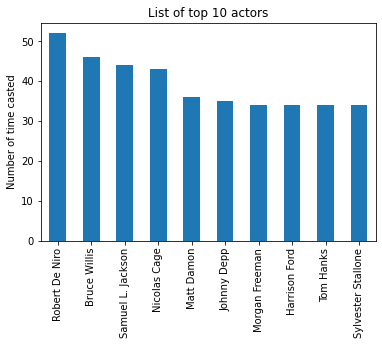

In [51]:
actor = data['cast'].str.cat(sep="|").split("|")
actors_list = pd.Series(actor).value_counts()[:10]
print(actors_list)
graph = actors_list.plot.bar()
graph.set(title = "List of top 10 actors",ylabel = "Number of time casted")

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
dtype: int64


[Text(0.5, 0, 'Number of time movies made'),
 Text(0.5, 1.0, 'List of top 10 Genres')]

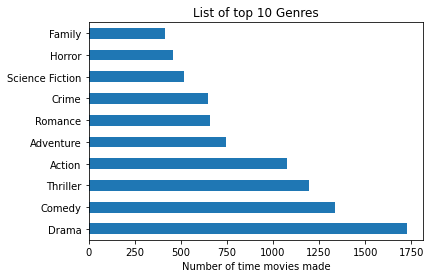

In [52]:
genres = data['genres'].str.cat(sep="|").split("|")
genres_list = pd.Series(genres).value_counts()[:10]
print(genres_list)
graph = genres_list.plot.barh()
graph.set(title = "List of top 10 Genres",xlabel = "Number of time movies made")

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           17
Robert Rodriguez     17
Robert Zemeckis      15
Oliver Stone         15
dtype: int64


[Text(0, 0.5, 'Number of movies directed'),
 Text(0.5, 1.0, 'List of top 10 directors')]

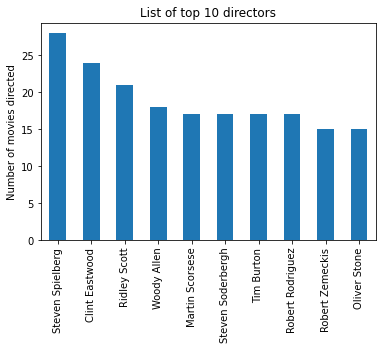

In [53]:
director = data['director'].str.cat(sep="|").split("|")
director_list = pd.Series(director).value_counts()[:10]
print(director_list)
graph = director_list.plot.bar()
graph.set(title = "List of top 10 directors",ylabel = "Number of movies directed")

# Question 5 : Average runtime of the movies

In [54]:
Avg_runtime = data['runtime'].mean()
print('Average runtime of movies is %.2f'%Avg_runtime)

Average runtime of movies is 109.35


Text(0.5, 1.0, 'Runtime of all movies')

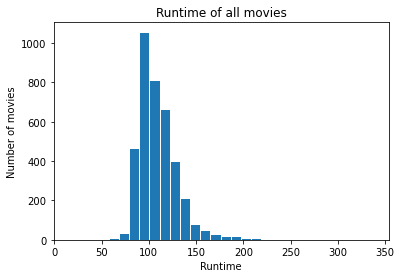

In [55]:
plt.hist(data['runtime'], rwidth =.9, bins=30)
plt.xlabel('Runtime')
plt.ylabel('Number of movies')
plt.title('Runtime of all movies')

The above graph also confirms the average runtime. Lets make another box plot for the same using seaborn

Text(0.5, 0, 'Runtime')

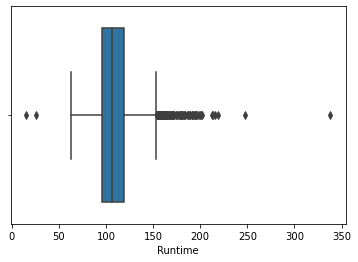

In [56]:
sns.boxplot(data['runtime'])
plt.xlabel('Runtime')

This also proves the average runtime is approx 109



In [57]:
avg_budget = data['budget_adj'].mean()
avg_revenue = data['revenue_adj'].mean()
print('The average Budget of movies %.2f'%avg_budget)
print('The average revenue of movies %.2f'%avg_revenue)

The average Budget of movies 44719764.83
The average revenue of movies 138715933.89


**Plot between Runtime and Profit**

Text(0.5, 1.0, 'Runtime vs Profit')

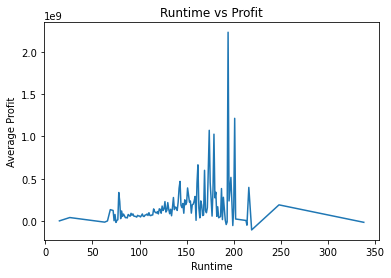

In [58]:
data.groupby('runtime')['profit'].mean().plot()

plt.xlabel('Runtime')
plt.ylabel('Average Profit')
plt.title('Runtime vs Profit')

According to the plot runtime between 150-200 had the most profit.

**Plot between Release_Year and Runtime**

Text(0.5, 1.0, 'Release_year vs Runtime')

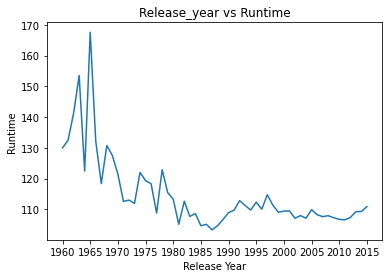

In [59]:
data.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

sns.set(rc={'figure.figsize':(20,3)})
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Release_year vs Runtime')

The above graph shows the earlier runtime of movies was more and has been decreased recently.

# Conclusions

**Interesting facts about this Data**

1. Average runtime of movie is 109.35
2. Top four Genres for movies are - Drama,Comdedy,Thriller,Action.
3. Top four movie Directors are : Steven Spielberg,Clint Eastwood,Ridley Scott,Woody Allen
4. Top 5 Cast: Robert De Niro,Bruce Willis,Samuel L. Jackson, Matt Damon,Nicolas Cage
5. The number of movie released are increasing year by year.
6. Runtime between 150-200 had the most profit.
7. Low revenue movies are more popular.

**Having an Average Budget of 44719764.83 , runtime 109 mins, and above listed genres,caste and director, Revenue of 138715933.89 could be generated**

Limitations
i) The Data had lot of zero values and Null values and we have deleted that columns which might have resulted in loosing valuable data.

ii) Also,budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency.